In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [2]:
df=pd.read_csv("./teacher_data.csv") #讀csv
print(df)

      age gender  height  weight attitude  prepare_hours class_type pass_rate  \
0      43      F     180      67  Serious              5   Physical      High   
1      52      M     157      50  Serious              5   Physical      High   
2      36      M     161      42  Serious              3   Physical      High   
3      52      M     162      54  Serious              6   Physical      High   
4      28      M     179      41  Serious              0     Online       Low   
...   ...    ...     ...     ...      ...            ...        ...       ...   
5995   30      M     145      81  Serious              3   Physical      High   
5996   57      F     171      58  Serious              5   Physical      High   
5997   38      F     151      66  Serious              6   Physical      High   
5998   52      F     151      92  Serious              6     Online       Low   
5999   64      M     140     100  Serious              3   Physical      High   

      glasses classhw care 

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["gender"]=label_encoder.fit_transform(df["gender"]) # 對gender做label Encoder
df["attitude"]=label_encoder.fit_transform(df["attitude"]) # 對attitude做label Encoder
df["class_type"]=label_encoder.fit_transform(df["class_type"]) # 對class_type做label Encoder
df["pass_rate"]=label_encoder.fit_transform(df["pass_rate"]) # 對pass_rate做label Encoder
df["classhw"]=label_encoder.fit_transform(df["classhw"]) # 對classhw做label Encoder
df["care"]=label_encoder.fit_transform(df["care"]) # 對care做label Encoder
df["label"]=label_encoder.fit_transform(df["label"]) # 對label做label Encoder
print(df)

      age  gender  height  weight  attitude  prepare_hours  class_type  \
0      43       0     180      67         1              5           1   
1      52       1     157      50         1              5           1   
2      36       1     161      42         1              3           1   
3      52       1     162      54         1              6           1   
4      28       1     179      41         1              0           0   
...   ...     ...     ...     ...       ...            ...         ...   
5995   30       1     145      81         1              3           1   
5996   57       0     171      58         1              5           1   
5997   38       0     151      66         1              6           1   
5998   52       0     151      92         1              6           0   
5999   64       1     140     100         1              3           1   

      pass_rate  glasses  classhw  care  label  
0             0        0        0     1      1  
1            

In [4]:
df=df.dropna()
print("當前資料缺失值總數:",len(np.where(np.isnan(df))[0]))

當前資料缺失值總數: 0


In [5]:
from sklearn.model_selection import train_test_split
X=df.drop(labels=["label"],axis=1).values #沒label
y=df["label"].values #有label
print("X:\n",X)
print("y:\n",y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print("Training data shape:",X_train.shape)
print("Testing data shape:",X_test.shape)

X:
 [[ 43   0 180 ...   0   0   1]
 [ 52   1 157 ...   0   1   1]
 [ 36   1 161 ...   1   0   1]
 ...
 [ 38   0 151 ...   0   2   1]
 [ 52   0 151 ...   0   0   1]
 [ 64   1 140 ...   0   2   1]]
y:
 [1 1 1 ... 1 0 1]
Training data shape: (4500, 11)
Testing data shape: (1500, 11)


In [6]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 預測成功的比例
print('訓練集準確率: ',xgboostModel.score(X_train,y_train))
print('測試集準確率: ',xgboostModel.score(X_test,y_test))

訓練集準確率:  1.0
測試集準確率:  1.0


特徵重要程度:  [3.6895433e-06 3.5382461e-06 2.7120802e-06 2.7072338e-06 2.8607836e-01
 1.8437011e-02 3.5273343e-01 2.2070520e-01 2.9075502e-06 4.5679467e-06
 1.2202578e-01]


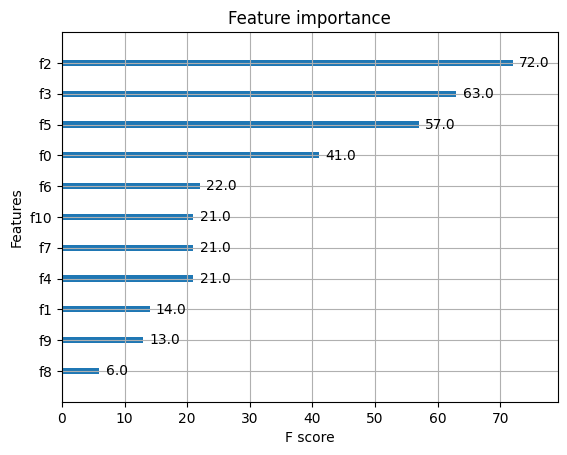

In [7]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel)
print('特徵重要程度: ',xgboostModel.feature_importances_)

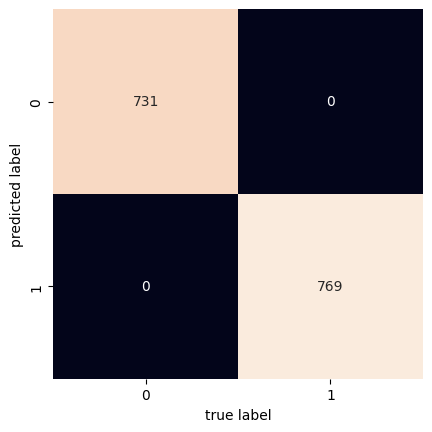

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_prediction = xgboostModel.predict(X_test)
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0, 1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

In [9]:
df_alter=pd.read_csv("./teacher_data_alter.csv") #讀csv

label_encoder=LabelEncoder()
df_alter["gender"]=label_encoder.fit_transform(df_alter["gender"]) # 對gender做label Encoder
df_alter["attitude"]=label_encoder.fit_transform(df_alter["attitude"]) # 對attitude做label Encoder
df_alter["class_type"]=label_encoder.fit_transform(df_alter["class_type"]) # 對class_type做label Encoder
df_alter["pass_rate"]=label_encoder.fit_transform(df_alter["pass_rate"]) # 對pass_rate做label Encoder
df_alter["classhw"]=label_encoder.fit_transform(df_alter["classhw"]) # 對classhw做label Encoder
df_alter["care"]=label_encoder.fit_transform(df_alter["care"]) # 對care做label Encoder
df_alter["label"]=label_encoder.fit_transform(df_alter["label"]) # 對label做label Encoder

X_alter=df_alter.drop(labels=["label"],axis=1).values
y_alter=df_alter["label"].values
print("微調後資料集準確率:",xgboostModel.score(X_alter,y_alter)) #使用測試資料預測分類，並印出準確率

微調後資料集準確率: 0.887


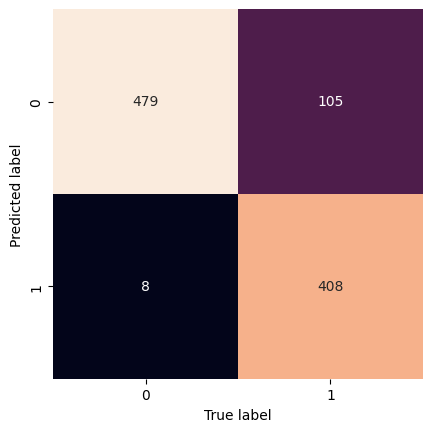

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_prediction_alter = xgboostModel.predict(X_alter)
mat = confusion_matrix(y_alter, y_prediction_alter)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0, 1], yticklabels=[0,1])
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()